## Sumbitted by: Sayan Chakraborty, EE18MTECH11030
## Code: Sparse Autoencoder

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# %matplotlib qt

## The backpropagation algorithm is implemented as follows:

In [2]:
""" 
The update equations are mentioned as follows:
1) Weight update from hidden to output layer: W_jh = W_jh - eta * ( S(Z)^T . {(S(Y)-d) * Sd_Y} ) 
2) Weight update from input to hidden layer: W_hi = W_hi - eta * X^T . ({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z) 
3) Bias updates for output layer: bo = bo - eta * sum({(S(Y)-d) * Sd_Y})
4) Bias updates for hidden layer: bh = bh - eta * sum({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z )

where, * = elementwise product, . = dot product, ()^T = transpose operation,
eta = learning rate, Z = hidden layer activation potential, S(Z) = hidden layer activation,
Y = output layer activation potential, S(Y) = output layer activation, Sd_Z = derivative of S(Z), 
Sd_Y = derivative of S(Y)
"""

def forward_pass(X, W_hi, W_jh, b_h, b_o):
      
    # hidden layer
    Z = np.dot(X, W_hi) + b_h  # hidden layer activation potential
    S_Z = sigmod_fun(Z)       # hidden layer output
    
    # Output layer
    Y = np.dot(S_Z, W_jh) + b_o  # output layer activation potential
    S_Y = sigmod_fun(Y)          # output layer output
    return Z, Y, S_Z, S_Y

def back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta, p, lam):
    e = (S_Y - d)/X.shape[1]
    Sd_Y = sigmod_deriv_fun(Y) # Compute the derivative of the S(Y)
    Sd_Z = sigmod_deriv_fun(Z) # Compute the derivative of the S(Z)
    sc_error = e*Sd_Y          # Compute the scaled error 
    
    # compute p_hat
    p_hat = np.sum(S_Z, axis = 1) / S_Z.shape[1]  
    
    # compute KL divergence and its gradient
    KL_div = lam*np.sum(p*np.log(p/p_hat) + 
                        (1 - p)*np.log((1 - p)/(1 - p_hat)))
    KL_div_d = lam*(-(p/p_hat) + ((1 - p) / (1 - p_hat)))    
    KL_div_d = np.reshape(KL_div_d, (KL_div_d.shape[0], 1))/X.shape[1]
    
    # output bias update
    b_o = b_o - eta*np.sum(sc_error)
    
    # hidden bias update
    b_h = b_h - eta*np.sum( (np.dot(sc_error, W_jh.T) + KL_div_d  )*Sd_Z )     
                                          
    # weight update input to hidden
    W_hi = W_hi - eta*np.dot(X.T,((np.dot(sc_error, W_jh.T) + KL_div_d  )*Sd_Z))
    
    # weight update hidden to output
    W_jh = W_jh - eta * np.dot(S_Z.T,sc_error) 

    return W_jh, W_hi, b_o, b_h

def sigmod_fun(X):
    return 1/(1+np.exp(-X))

def sigmod_deriv_fun(X):
    X_sig = sigmod_fun(X)
    Z = X_sig*(1-X_sig)
    return Z


## Training:

In [3]:
""" 
NOTE: The mnist_14_14.npz dataset is included in the folder. The dataset contains images resized to 14*14. 
The dataset contains 500 training and 500 testing data with 50 images of each type (0,1,2,...,9). The dataset is
completely shuffled. 
The code takes approximately 2 mins to run.
"""

c = np.load('mnist_14_14.npz') 
X_train = c['x_train']
X = X_train
d = X
X_test = c['x_test']
X_test = X_test
d_test = X_test

epochs = 10000
eta = 0.1
p = 0.1432
lam = 0.5

num_in_node, num_hid_node, num_op_node = X_train.shape[1],X_train.shape[1]+10,X_train.shape[1]
r = math.sqrt(6) / math.sqrt(num_in_node + num_hid_node + 1) 
# initialize weights and biases
W_hi = np.random.uniform(low = -r, high = r, size = (num_in_node,num_hid_node))
W_jh =  np.random.uniform(low = -r, high = r, size = (num_hid_node,num_op_node))
b_h =  np.random.uniform(size = (1,num_hid_node))
b_o =  np.random.uniform(size = (1,num_op_node))

# Z, Y, S_Z, S_Y = forward_pass(X, W_hi, W_jh, b_h, b_o)
# back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta, p, lam)

Wo = np.zeros((num_hid_node,num_op_node))
error_epoch = np.zeros((epochs,1))
print('training in progress..............')
for i in range(epochs):
    Z, Y, S_Z, S_Y = forward_pass(X, W_hi, W_jh, b_h, b_o)
    W_jh, W_hi, b_o, b_h = back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta, p, lam)
    error = ((S_Y - d)*(S_Y - d)).flatten()
    error_epoch[i] = np.sum(error)/len(error)
    print('iter = ', i, ', error = ', error_epoch[i])
        
print('training completed ...............')
        


training in progress..............
iter =  0 , error =  [0.33648536]
iter =  1 , error =  [0.09041977]
iter =  2 , error =  [0.09024945]
iter =  3 , error =  [0.09012753]
iter =  4 , error =  [0.09110119]
iter =  5 , error =  [0.08973865]
iter =  6 , error =  [0.09059243]
iter =  7 , error =  [0.08936962]
iter =  8 , error =  [0.09044222]
iter =  9 , error =  [0.08866605]
iter =  10 , error =  [0.08916492]
iter =  11 , error =  [0.08830047]
iter =  12 , error =  [0.08832609]
iter =  13 , error =  [0.08691622]
iter =  14 , error =  [0.08696976]
iter =  15 , error =  [0.08497392]
iter =  16 , error =  [0.08441734]
iter =  17 , error =  [0.08194244]
iter =  18 , error =  [0.07985314]
iter =  19 , error =  [0.07669508]
iter =  20 , error =  [0.07208628]
iter =  21 , error =  [0.0696697]
iter =  22 , error =  [0.06360833]
iter =  23 , error =  [0.06600956]
iter =  24 , error =  [0.05928898]
iter =  25 , error =  [0.0637846]
iter =  26 , error =  [0.05660013]
iter =  27 , error =  [0.0612788

iter =  239 , error =  [0.04230355]
iter =  240 , error =  [0.04179566]
iter =  241 , error =  [0.04218383]
iter =  242 , error =  [0.04167661]
iter =  243 , error =  [0.04205836]
iter =  244 , error =  [0.04155449]
iter =  245 , error =  [0.04192816]
iter =  246 , error =  [0.04142989]
iter =  247 , error =  [0.0417943]
iter =  248 , error =  [0.04130343]
iter =  249 , error =  [0.04165782]
iter =  250 , error =  [0.0411757]
iter =  251 , error =  [0.04151966]
iter =  252 , error =  [0.04104718]
iter =  253 , error =  [0.04138064]
iter =  254 , error =  [0.04091833]
iter =  255 , error =  [0.04124145]
iter =  256 , error =  [0.04078947]
iter =  257 , error =  [0.04110263]
iter =  258 , error =  [0.04066089]
iter =  259 , error =  [0.04096458]
iter =  260 , error =  [0.04053277]
iter =  261 , error =  [0.0408276]
iter =  262 , error =  [0.04040525]
iter =  263 , error =  [0.0406919]
iter =  264 , error =  [0.04027842]
iter =  265 , error =  [0.04055761]
iter =  266 , error =  [0.040152

iter =  477 , error =  [0.03013693]
iter =  478 , error =  [0.02992062]
iter =  479 , error =  [0.03007222]
iter =  480 , error =  [0.0298562]
iter =  481 , error =  [0.0300079]
iter =  482 , error =  [0.02979221]
iter =  483 , error =  [0.02994397]
iter =  484 , error =  [0.02972864]
iter =  485 , error =  [0.02988042]
iter =  486 , error =  [0.02966548]
iter =  487 , error =  [0.02981723]
iter =  488 , error =  [0.02960273]
iter =  489 , error =  [0.0297544]
iter =  490 , error =  [0.02954038]
iter =  491 , error =  [0.02969191]
iter =  492 , error =  [0.02947842]
iter =  493 , error =  [0.02962977]
iter =  494 , error =  [0.02941685]
iter =  495 , error =  [0.02956796]
iter =  496 , error =  [0.02935566]
iter =  497 , error =  [0.02950649]
iter =  498 , error =  [0.02929484]
iter =  499 , error =  [0.02944534]
iter =  500 , error =  [0.0292344]
iter =  501 , error =  [0.02938451]
iter =  502 , error =  [0.02917432]
iter =  503 , error =  [0.02932399]
iter =  504 , error =  [0.029114

iter =  707 , error =  [0.02470705]
iter =  708 , error =  [0.02452387]
iter =  709 , error =  [0.02467159]
iter =  710 , error =  [0.02448854]
iter =  711 , error =  [0.0246362]
iter =  712 , error =  [0.02445332]
iter =  713 , error =  [0.02460088]
iter =  714 , error =  [0.02441819]
iter =  715 , error =  [0.02456563]
iter =  716 , error =  [0.02438315]
iter =  717 , error =  [0.02453046]
iter =  718 , error =  [0.02434822]
iter =  719 , error =  [0.02449536]
iter =  720 , error =  [0.02431338]
iter =  721 , error =  [0.02446033]
iter =  722 , error =  [0.02427864]
iter =  723 , error =  [0.02442539]
iter =  724 , error =  [0.02424399]
iter =  725 , error =  [0.02439053]
iter =  726 , error =  [0.02420945]
iter =  727 , error =  [0.02435575]
iter =  728 , error =  [0.02417501]
iter =  729 , error =  [0.02432106]
iter =  730 , error =  [0.02414066]
iter =  731 , error =  [0.02428646]
iter =  732 , error =  [0.02410642]
iter =  733 , error =  [0.02425196]
iter =  734 , error =  [0.024

iter =  953 , error =  [0.02100005]
iter =  954 , error =  [0.02084778]
iter =  955 , error =  [0.02097391]
iter =  956 , error =  [0.02082219]
iter =  957 , error =  [0.02094784]
iter =  958 , error =  [0.02079667]
iter =  959 , error =  [0.02092183]
iter =  960 , error =  [0.02077122]
iter =  961 , error =  [0.0208959]
iter =  962 , error =  [0.02074584]
iter =  963 , error =  [0.02087003]
iter =  964 , error =  [0.02072052]
iter =  965 , error =  [0.02084424]
iter =  966 , error =  [0.02069527]
iter =  967 , error =  [0.02081851]
iter =  968 , error =  [0.02067009]
iter =  969 , error =  [0.02079286]
iter =  970 , error =  [0.02064498]
iter =  971 , error =  [0.02076727]
iter =  972 , error =  [0.02061993]
iter =  973 , error =  [0.02074176]
iter =  974 , error =  [0.02059495]
iter =  975 , error =  [0.02071631]
iter =  976 , error =  [0.02057004]
iter =  977 , error =  [0.02069093]
iter =  978 , error =  [0.02054519]
iter =  979 , error =  [0.02066563]
iter =  980 , error =  [0.020

iter =  1179 , error =  [0.0184327]
iter =  1180 , error =  [0.01834722]
iter =  1181 , error =  [0.01841307]
iter =  1182 , error =  [0.01832829]
iter =  1183 , error =  [0.01839349]
iter =  1184 , error =  [0.0183094]
iter =  1185 , error =  [0.01837396]
iter =  1186 , error =  [0.01829057]
iter =  1187 , error =  [0.01835448]
iter =  1188 , error =  [0.01827179]
iter =  1189 , error =  [0.01833505]
iter =  1190 , error =  [0.01825305]
iter =  1191 , error =  [0.01831567]
iter =  1192 , error =  [0.01823437]
iter =  1193 , error =  [0.01829634]
iter =  1194 , error =  [0.01821574]
iter =  1195 , error =  [0.01827707]
iter =  1196 , error =  [0.01819715]
iter =  1197 , error =  [0.01825784]
iter =  1198 , error =  [0.01817862]
iter =  1199 , error =  [0.01823866]
iter =  1200 , error =  [0.01816013]
iter =  1201 , error =  [0.01821953]
iter =  1202 , error =  [0.01814169]
iter =  1203 , error =  [0.01820045]
iter =  1204 , error =  [0.0181233]
iter =  1205 , error =  [0.01818142]
iter

iter =  1401 , error =  [0.01652552]
iter =  1402 , error =  [0.01650297]
iter =  1403 , error =  [0.01651044]
iter =  1404 , error =  [0.01648824]
iter =  1405 , error =  [0.01649539]
iter =  1406 , error =  [0.01647353]
iter =  1407 , error =  [0.01648037]
iter =  1408 , error =  [0.01645886]
iter =  1409 , error =  [0.01646539]
iter =  1410 , error =  [0.0164442]
iter =  1411 , error =  [0.01645043]
iter =  1412 , error =  [0.01642957]
iter =  1413 , error =  [0.0164355]
iter =  1414 , error =  [0.01641497]
iter =  1415 , error =  [0.0164206]
iter =  1416 , error =  [0.01640039]
iter =  1417 , error =  [0.01640573]
iter =  1418 , error =  [0.01638584]
iter =  1419 , error =  [0.01639089]
iter =  1420 , error =  [0.01637131]
iter =  1421 , error =  [0.01637608]
iter =  1422 , error =  [0.01635681]
iter =  1423 , error =  [0.0163613]
iter =  1424 , error =  [0.01634233]
iter =  1425 , error =  [0.01634655]
iter =  1426 , error =  [0.01632787]
iter =  1427 , error =  [0.01633182]
iter 

iter =  1625 , error =  [0.01499563]
iter =  1626 , error =  [0.01498911]
iter =  1627 , error =  [0.01498319]
iter =  1628 , error =  [0.0149767]
iter =  1629 , error =  [0.01497078]
iter =  1630 , error =  [0.01496431]
iter =  1631 , error =  [0.01495839]
iter =  1632 , error =  [0.01495194]
iter =  1633 , error =  [0.01494601]
iter =  1634 , error =  [0.01493959]
iter =  1635 , error =  [0.01493366]
iter =  1636 , error =  [0.01492726]
iter =  1637 , error =  [0.01492132]
iter =  1638 , error =  [0.01491494]
iter =  1639 , error =  [0.014909]
iter =  1640 , error =  [0.01490264]
iter =  1641 , error =  [0.01489671]
iter =  1642 , error =  [0.01489036]
iter =  1643 , error =  [0.01488443]
iter =  1644 , error =  [0.0148781]
iter =  1645 , error =  [0.01487216]
iter =  1646 , error =  [0.01486586]
iter =  1647 , error =  [0.01485992]
iter =  1648 , error =  [0.01485363]
iter =  1649 , error =  [0.0148477]
iter =  1650 , error =  [0.01484143]
iter =  1651 , error =  [0.01483549]
iter =

iter =  1848 , error =  [0.01371953]
iter =  1849 , error =  [0.01371429]
iter =  1850 , error =  [0.01370904]
iter =  1851 , error =  [0.0137038]
iter =  1852 , error =  [0.01369856]
iter =  1853 , error =  [0.01369333]
iter =  1854 , error =  [0.0136881]
iter =  1855 , error =  [0.01368288]
iter =  1856 , error =  [0.01367766]
iter =  1857 , error =  [0.01367244]
iter =  1858 , error =  [0.01366723]
iter =  1859 , error =  [0.01366202]
iter =  1860 , error =  [0.01365682]
iter =  1861 , error =  [0.01365161]
iter =  1862 , error =  [0.01364642]
iter =  1863 , error =  [0.01364123]
iter =  1864 , error =  [0.01363604]
iter =  1865 , error =  [0.01363085]
iter =  1866 , error =  [0.01362567]
iter =  1867 , error =  [0.0136205]
iter =  1868 , error =  [0.01361532]
iter =  1869 , error =  [0.01361015]
iter =  1870 , error =  [0.01360499]
iter =  1871 , error =  [0.01359983]
iter =  1872 , error =  [0.01359467]
iter =  1873 , error =  [0.01358952]
iter =  1874 , error =  [0.01358437]
iter

iter =  2086 , error =  [0.01257778]
iter =  2087 , error =  [0.01257342]
iter =  2088 , error =  [0.01256905]
iter =  2089 , error =  [0.01256469]
iter =  2090 , error =  [0.01256033]
iter =  2091 , error =  [0.01255597]
iter =  2092 , error =  [0.01255162]
iter =  2093 , error =  [0.01254727]
iter =  2094 , error =  [0.01254293]
iter =  2095 , error =  [0.01253859]
iter =  2096 , error =  [0.01253425]
iter =  2097 , error =  [0.01252991]
iter =  2098 , error =  [0.01252558]
iter =  2099 , error =  [0.01252125]
iter =  2100 , error =  [0.01251693]
iter =  2101 , error =  [0.01251261]
iter =  2102 , error =  [0.01250829]
iter =  2103 , error =  [0.01250397]
iter =  2104 , error =  [0.01249966]
iter =  2105 , error =  [0.01249535]
iter =  2106 , error =  [0.01249105]
iter =  2107 , error =  [0.01248674]
iter =  2108 , error =  [0.01248244]
iter =  2109 , error =  [0.01247815]
iter =  2110 , error =  [0.01247386]
iter =  2111 , error =  [0.01246957]
iter =  2112 , error =  [0.01246528]
i

iter =  2312 , error =  [0.01167034]
iter =  2313 , error =  [0.01166666]
iter =  2314 , error =  [0.01166298]
iter =  2315 , error =  [0.0116593]
iter =  2316 , error =  [0.01165563]
iter =  2317 , error =  [0.01165195]
iter =  2318 , error =  [0.01164828]
iter =  2319 , error =  [0.01164462]
iter =  2320 , error =  [0.01164095]
iter =  2321 , error =  [0.01163729]
iter =  2322 , error =  [0.01163363]
iter =  2323 , error =  [0.01162998]
iter =  2324 , error =  [0.01162633]
iter =  2325 , error =  [0.01162268]
iter =  2326 , error =  [0.01161903]
iter =  2327 , error =  [0.01161538]
iter =  2328 , error =  [0.01161174]
iter =  2329 , error =  [0.0116081]
iter =  2330 , error =  [0.01160446]
iter =  2331 , error =  [0.01160083]
iter =  2332 , error =  [0.0115972]
iter =  2333 , error =  [0.01159357]
iter =  2334 , error =  [0.01158994]
iter =  2335 , error =  [0.01158632]
iter =  2336 , error =  [0.0115827]
iter =  2337 , error =  [0.01157908]
iter =  2338 , error =  [0.01157546]
iter 

iter =  2549 , error =  [0.01086782]
iter =  2550 , error =  [0.01086471]
iter =  2551 , error =  [0.0108616]
iter =  2552 , error =  [0.01085849]
iter =  2553 , error =  [0.01085539]
iter =  2554 , error =  [0.01085229]
iter =  2555 , error =  [0.01084919]
iter =  2556 , error =  [0.01084609]
iter =  2557 , error =  [0.01084299]
iter =  2558 , error =  [0.0108399]
iter =  2559 , error =  [0.01083681]
iter =  2560 , error =  [0.01083372]
iter =  2561 , error =  [0.01083063]
iter =  2562 , error =  [0.01082755]
iter =  2563 , error =  [0.01082446]
iter =  2564 , error =  [0.01082138]
iter =  2565 , error =  [0.01081831]
iter =  2566 , error =  [0.01081523]
iter =  2567 , error =  [0.01081215]
iter =  2568 , error =  [0.01080908]
iter =  2569 , error =  [0.01080601]
iter =  2570 , error =  [0.01080294]
iter =  2571 , error =  [0.01079988]
iter =  2572 , error =  [0.01079681]
iter =  2573 , error =  [0.01079375]
iter =  2574 , error =  [0.01079069]
iter =  2575 , error =  [0.01078763]
ite

iter =  2774 , error =  [0.01021756]
iter =  2775 , error =  [0.01021488]
iter =  2776 , error =  [0.0102122]
iter =  2777 , error =  [0.01020951]
iter =  2778 , error =  [0.01020683]
iter =  2779 , error =  [0.01020415]
iter =  2780 , error =  [0.01020148]
iter =  2781 , error =  [0.0101988]
iter =  2782 , error =  [0.01019613]
iter =  2783 , error =  [0.01019346]
iter =  2784 , error =  [0.01019079]
iter =  2785 , error =  [0.01018812]
iter =  2786 , error =  [0.01018545]
iter =  2787 , error =  [0.01018279]
iter =  2788 , error =  [0.01018012]
iter =  2789 , error =  [0.01017746]
iter =  2790 , error =  [0.0101748]
iter =  2791 , error =  [0.01017214]
iter =  2792 , error =  [0.01016948]
iter =  2793 , error =  [0.01016683]
iter =  2794 , error =  [0.01016417]
iter =  2795 , error =  [0.01016152]
iter =  2796 , error =  [0.01015887]
iter =  2797 , error =  [0.01015622]
iter =  2798 , error =  [0.01015357]
iter =  2799 , error =  [0.01015093]
iter =  2800 , error =  [0.01014828]
iter

iter =  3005 , error =  [0.00963789]
iter =  3006 , error =  [0.00963554]
iter =  3007 , error =  [0.0096332]
iter =  3008 , error =  [0.00963085]
iter =  3009 , error =  [0.00962851]
iter =  3010 , error =  [0.00962617]
iter =  3011 , error =  [0.00962383]
iter =  3012 , error =  [0.00962149]
iter =  3013 , error =  [0.00961915]
iter =  3014 , error =  [0.00961681]
iter =  3015 , error =  [0.00961448]
iter =  3016 , error =  [0.00961214]
iter =  3017 , error =  [0.00960981]
iter =  3018 , error =  [0.00960748]
iter =  3019 , error =  [0.00960515]
iter =  3020 , error =  [0.00960282]
iter =  3021 , error =  [0.00960049]
iter =  3022 , error =  [0.00959817]
iter =  3023 , error =  [0.00959584]
iter =  3024 , error =  [0.00959352]
iter =  3025 , error =  [0.00959119]
iter =  3026 , error =  [0.00958887]
iter =  3027 , error =  [0.00958655]
iter =  3028 , error =  [0.00958423]
iter =  3029 , error =  [0.00958191]
iter =  3030 , error =  [0.0095796]
iter =  3031 , error =  [0.00957728]
ite

iter =  3236 , error =  [0.00912706]
iter =  3237 , error =  [0.00912497]
iter =  3238 , error =  [0.00912289]
iter =  3239 , error =  [0.0091208]
iter =  3240 , error =  [0.00911872]
iter =  3241 , error =  [0.00911664]
iter =  3242 , error =  [0.00911456]
iter =  3243 , error =  [0.00911248]
iter =  3244 , error =  [0.0091104]
iter =  3245 , error =  [0.00910832]
iter =  3246 , error =  [0.00910625]
iter =  3247 , error =  [0.00910417]
iter =  3248 , error =  [0.00910209]
iter =  3249 , error =  [0.00910002]
iter =  3250 , error =  [0.00909795]
iter =  3251 , error =  [0.00909587]
iter =  3252 , error =  [0.0090938]
iter =  3253 , error =  [0.00909173]
iter =  3254 , error =  [0.00908966]
iter =  3255 , error =  [0.0090876]
iter =  3256 , error =  [0.00908553]
iter =  3257 , error =  [0.00908346]
iter =  3258 , error =  [0.0090814]
iter =  3259 , error =  [0.00907933]
iter =  3260 , error =  [0.00907727]
iter =  3261 , error =  [0.00907521]
iter =  3262 , error =  [0.00907315]
iter =

iter =  3474 , error =  [0.00865657]
iter =  3475 , error =  [0.0086547]
iter =  3476 , error =  [0.00865283]
iter =  3477 , error =  [0.00865095]
iter =  3478 , error =  [0.00864908]
iter =  3479 , error =  [0.00864721]
iter =  3480 , error =  [0.00864534]
iter =  3481 , error =  [0.00864347]
iter =  3482 , error =  [0.0086416]
iter =  3483 , error =  [0.00863973]
iter =  3484 , error =  [0.00863787]
iter =  3485 , error =  [0.008636]
iter =  3486 , error =  [0.00863413]
iter =  3487 , error =  [0.00863227]
iter =  3488 , error =  [0.00863041]
iter =  3489 , error =  [0.00862854]
iter =  3490 , error =  [0.00862668]
iter =  3491 , error =  [0.00862482]
iter =  3492 , error =  [0.00862296]
iter =  3493 , error =  [0.0086211]
iter =  3494 , error =  [0.00861924]
iter =  3495 , error =  [0.00861738]
iter =  3496 , error =  [0.00861552]
iter =  3497 , error =  [0.00861367]
iter =  3498 , error =  [0.00861181]
iter =  3499 , error =  [0.00860996]
iter =  3500 , error =  [0.0086081]
iter = 

iter =  3708 , error =  [0.00823928]
iter =  3709 , error =  [0.00823758]
iter =  3710 , error =  [0.00823589]
iter =  3711 , error =  [0.0082342]
iter =  3712 , error =  [0.00823251]
iter =  3713 , error =  [0.00823082]
iter =  3714 , error =  [0.00822913]
iter =  3715 , error =  [0.00822744]
iter =  3716 , error =  [0.00822575]
iter =  3717 , error =  [0.00822406]
iter =  3718 , error =  [0.00822238]
iter =  3719 , error =  [0.00822069]
iter =  3720 , error =  [0.008219]
iter =  3721 , error =  [0.00821732]
iter =  3722 , error =  [0.00821564]
iter =  3723 , error =  [0.00821395]
iter =  3724 , error =  [0.00821227]
iter =  3725 , error =  [0.00821059]
iter =  3726 , error =  [0.00820891]
iter =  3727 , error =  [0.00820723]
iter =  3728 , error =  [0.00820555]
iter =  3729 , error =  [0.00820387]
iter =  3730 , error =  [0.00820219]
iter =  3731 , error =  [0.00820051]
iter =  3732 , error =  [0.00819884]
iter =  3733 , error =  [0.00819716]
iter =  3734 , error =  [0.00819549]
iter

iter =  3939 , error =  [0.00786741]
iter =  3940 , error =  [0.00786589]
iter =  3941 , error =  [0.00786436]
iter =  3942 , error =  [0.00786283]
iter =  3943 , error =  [0.0078613]
iter =  3944 , error =  [0.00785978]
iter =  3945 , error =  [0.00785825]
iter =  3946 , error =  [0.00785673]
iter =  3947 , error =  [0.0078552]
iter =  3948 , error =  [0.00785368]
iter =  3949 , error =  [0.00785215]
iter =  3950 , error =  [0.00785063]
iter =  3951 , error =  [0.00784911]
iter =  3952 , error =  [0.00784759]
iter =  3953 , error =  [0.00784607]
iter =  3954 , error =  [0.00784455]
iter =  3955 , error =  [0.00784303]
iter =  3956 , error =  [0.00784151]
iter =  3957 , error =  [0.00783999]
iter =  3958 , error =  [0.00783848]
iter =  3959 , error =  [0.00783696]
iter =  3960 , error =  [0.00783544]
iter =  3961 , error =  [0.00783393]
iter =  3962 , error =  [0.00783242]
iter =  3963 , error =  [0.0078309]
iter =  3964 , error =  [0.00782939]
iter =  3965 , error =  [0.00782788]
iter

iter =  4171 , error =  [0.00752924]
iter =  4172 , error =  [0.00752785]
iter =  4173 , error =  [0.00752646]
iter =  4174 , error =  [0.00752507]
iter =  4175 , error =  [0.00752368]
iter =  4176 , error =  [0.0075223]
iter =  4177 , error =  [0.00752091]
iter =  4178 , error =  [0.00751952]
iter =  4179 , error =  [0.00751813]
iter =  4180 , error =  [0.00751675]
iter =  4181 , error =  [0.00751536]
iter =  4182 , error =  [0.00751398]
iter =  4183 , error =  [0.00751259]
iter =  4184 , error =  [0.00751121]
iter =  4185 , error =  [0.00750983]
iter =  4186 , error =  [0.00750844]
iter =  4187 , error =  [0.00750706]
iter =  4188 , error =  [0.00750568]
iter =  4189 , error =  [0.0075043]
iter =  4190 , error =  [0.00750292]
iter =  4191 , error =  [0.00750154]
iter =  4192 , error =  [0.00750016]
iter =  4193 , error =  [0.00749878]
iter =  4194 , error =  [0.0074974]
iter =  4195 , error =  [0.00749602]
iter =  4196 , error =  [0.00749465]
iter =  4197 , error =  [0.00749327]
iter

iter =  4396 , error =  [0.00722936]
iter =  4397 , error =  [0.00722808]
iter =  4398 , error =  [0.00722681]
iter =  4399 , error =  [0.00722553]
iter =  4400 , error =  [0.00722425]
iter =  4401 , error =  [0.00722298]
iter =  4402 , error =  [0.0072217]
iter =  4403 , error =  [0.00722043]
iter =  4404 , error =  [0.00721915]
iter =  4405 , error =  [0.00721788]
iter =  4406 , error =  [0.0072166]
iter =  4407 , error =  [0.00721533]
iter =  4408 , error =  [0.00721406]
iter =  4409 , error =  [0.00721279]
iter =  4410 , error =  [0.00721152]
iter =  4411 , error =  [0.00721024]
iter =  4412 , error =  [0.00720897]
iter =  4413 , error =  [0.0072077]
iter =  4414 , error =  [0.00720643]
iter =  4415 , error =  [0.00720516]
iter =  4416 , error =  [0.0072039]
iter =  4417 , error =  [0.00720263]
iter =  4418 , error =  [0.00720136]
iter =  4419 , error =  [0.00720009]
iter =  4420 , error =  [0.00719882]
iter =  4421 , error =  [0.00719756]
iter =  4422 , error =  [0.00719629]
iter 

iter =  4624 , error =  [0.00694957]
iter =  4625 , error =  [0.00694839]
iter =  4626 , error =  [0.00694721]
iter =  4627 , error =  [0.00694604]
iter =  4628 , error =  [0.00694486]
iter =  4629 , error =  [0.00694368]
iter =  4630 , error =  [0.00694251]
iter =  4631 , error =  [0.00694133]
iter =  4632 , error =  [0.00694016]
iter =  4633 , error =  [0.00693898]
iter =  4634 , error =  [0.00693781]
iter =  4635 , error =  [0.00693663]
iter =  4636 , error =  [0.00693546]
iter =  4637 , error =  [0.00693428]
iter =  4638 , error =  [0.00693311]
iter =  4639 , error =  [0.00693194]
iter =  4640 , error =  [0.00693077]
iter =  4641 , error =  [0.00692959]
iter =  4642 , error =  [0.00692842]
iter =  4643 , error =  [0.00692725]
iter =  4644 , error =  [0.00692608]
iter =  4645 , error =  [0.00692491]
iter =  4646 , error =  [0.00692374]
iter =  4647 , error =  [0.00692257]
iter =  4648 , error =  [0.0069214]
iter =  4649 , error =  [0.00692023]
iter =  4650 , error =  [0.00691907]
it

iter =  4846 , error =  [0.00669763]
iter =  4847 , error =  [0.00669653]
iter =  4848 , error =  [0.00669544]
iter =  4849 , error =  [0.00669435]
iter =  4850 , error =  [0.00669326]
iter =  4851 , error =  [0.00669217]
iter =  4852 , error =  [0.00669108]
iter =  4853 , error =  [0.00668999]
iter =  4854 , error =  [0.0066889]
iter =  4855 , error =  [0.00668781]
iter =  4856 , error =  [0.00668672]
iter =  4857 , error =  [0.00668563]
iter =  4858 , error =  [0.00668454]
iter =  4859 , error =  [0.00668345]
iter =  4860 , error =  [0.00668236]
iter =  4861 , error =  [0.00668128]
iter =  4862 , error =  [0.00668019]
iter =  4863 , error =  [0.0066791]
iter =  4864 , error =  [0.00667802]
iter =  4865 , error =  [0.00667693]
iter =  4866 , error =  [0.00667584]
iter =  4867 , error =  [0.00667476]
iter =  4868 , error =  [0.00667367]
iter =  4869 , error =  [0.00667259]
iter =  4870 , error =  [0.0066715]
iter =  4871 , error =  [0.00667042]
iter =  4872 , error =  [0.00666934]
iter

iter =  5085 , error =  [0.00644647]
iter =  5086 , error =  [0.00644546]
iter =  5087 , error =  [0.00644445]
iter =  5088 , error =  [0.00644344]
iter =  5089 , error =  [0.00644243]
iter =  5090 , error =  [0.00644142]
iter =  5091 , error =  [0.00644041]
iter =  5092 , error =  [0.0064394]
iter =  5093 , error =  [0.00643839]
iter =  5094 , error =  [0.00643739]
iter =  5095 , error =  [0.00643638]
iter =  5096 , error =  [0.00643537]
iter =  5097 , error =  [0.00643437]
iter =  5098 , error =  [0.00643336]
iter =  5099 , error =  [0.00643235]
iter =  5100 , error =  [0.00643135]
iter =  5101 , error =  [0.00643034]
iter =  5102 , error =  [0.00642934]
iter =  5103 , error =  [0.00642833]
iter =  5104 , error =  [0.00642733]
iter =  5105 , error =  [0.00642632]
iter =  5106 , error =  [0.00642532]
iter =  5107 , error =  [0.00642432]
iter =  5108 , error =  [0.00642331]
iter =  5109 , error =  [0.00642231]
iter =  5110 , error =  [0.00642131]
iter =  5111 , error =  [0.0064203]
ite

iter =  5314 , error =  [0.0062233]
iter =  5315 , error =  [0.00622236]
iter =  5316 , error =  [0.00622142]
iter =  5317 , error =  [0.00622048]
iter =  5318 , error =  [0.00621954]
iter =  5319 , error =  [0.00621861]
iter =  5320 , error =  [0.00621767]
iter =  5321 , error =  [0.00621673]
iter =  5322 , error =  [0.00621579]
iter =  5323 , error =  [0.00621485]
iter =  5324 , error =  [0.00621392]
iter =  5325 , error =  [0.00621298]
iter =  5326 , error =  [0.00621204]
iter =  5327 , error =  [0.00621111]
iter =  5328 , error =  [0.00621017]
iter =  5329 , error =  [0.00620924]
iter =  5330 , error =  [0.0062083]
iter =  5331 , error =  [0.00620737]
iter =  5332 , error =  [0.00620643]
iter =  5333 , error =  [0.0062055]
iter =  5334 , error =  [0.00620456]
iter =  5335 , error =  [0.00620363]
iter =  5336 , error =  [0.0062027]
iter =  5337 , error =  [0.00620176]
iter =  5338 , error =  [0.00620083]
iter =  5339 , error =  [0.0061999]
iter =  5340 , error =  [0.00619896]
iter =

iter =  5536 , error =  [0.00602164]
iter =  5537 , error =  [0.00602076]
iter =  5538 , error =  [0.00601988]
iter =  5539 , error =  [0.00601901]
iter =  5540 , error =  [0.00601813]
iter =  5541 , error =  [0.00601725]
iter =  5542 , error =  [0.00601638]
iter =  5543 , error =  [0.0060155]
iter =  5544 , error =  [0.00601462]
iter =  5545 , error =  [0.00601375]
iter =  5546 , error =  [0.00601287]
iter =  5547 , error =  [0.006012]
iter =  5548 , error =  [0.00601112]
iter =  5549 , error =  [0.00601025]
iter =  5550 , error =  [0.00600937]
iter =  5551 , error =  [0.0060085]
iter =  5552 , error =  [0.00600762]
iter =  5553 , error =  [0.00600675]
iter =  5554 , error =  [0.00600588]
iter =  5555 , error =  [0.006005]
iter =  5556 , error =  [0.00600413]
iter =  5557 , error =  [0.00600326]
iter =  5558 , error =  [0.00600239]
iter =  5559 , error =  [0.00600151]
iter =  5560 , error =  [0.00600064]
iter =  5561 , error =  [0.00599977]
iter =  5562 , error =  [0.0059989]
iter =  

iter =  5765 , error =  [0.00582728]
iter =  5766 , error =  [0.00582646]
iter =  5767 , error =  [0.00582564]
iter =  5768 , error =  [0.00582482]
iter =  5769 , error =  [0.005824]
iter =  5770 , error =  [0.00582318]
iter =  5771 , error =  [0.00582237]
iter =  5772 , error =  [0.00582155]
iter =  5773 , error =  [0.00582073]
iter =  5774 , error =  [0.00581991]
iter =  5775 , error =  [0.00581909]
iter =  5776 , error =  [0.00581827]
iter =  5777 , error =  [0.00581746]
iter =  5778 , error =  [0.00581664]
iter =  5779 , error =  [0.00581582]
iter =  5780 , error =  [0.005815]
iter =  5781 , error =  [0.00581419]
iter =  5782 , error =  [0.00581337]
iter =  5783 , error =  [0.00581256]
iter =  5784 , error =  [0.00581174]
iter =  5785 , error =  [0.00581092]
iter =  5786 , error =  [0.00581011]
iter =  5787 , error =  [0.00580929]
iter =  5788 , error =  [0.00580848]
iter =  5789 , error =  [0.00580766]
iter =  5790 , error =  [0.00580685]
iter =  5791 , error =  [0.00580603]
iter 

iter =  5998 , error =  [0.00564239]
iter =  5999 , error =  [0.00564162]
iter =  6000 , error =  [0.00564085]
iter =  6001 , error =  [0.00564009]
iter =  6002 , error =  [0.00563932]
iter =  6003 , error =  [0.00563855]
iter =  6004 , error =  [0.00563779]
iter =  6005 , error =  [0.00563702]
iter =  6006 , error =  [0.00563625]
iter =  6007 , error =  [0.00563549]
iter =  6008 , error =  [0.00563472]
iter =  6009 , error =  [0.00563396]
iter =  6010 , error =  [0.00563319]
iter =  6011 , error =  [0.00563243]
iter =  6012 , error =  [0.00563166]
iter =  6013 , error =  [0.0056309]
iter =  6014 , error =  [0.00563013]
iter =  6015 , error =  [0.00562937]
iter =  6016 , error =  [0.00562861]
iter =  6017 , error =  [0.00562784]
iter =  6018 , error =  [0.00562708]
iter =  6019 , error =  [0.00562631]
iter =  6020 , error =  [0.00562555]
iter =  6021 , error =  [0.00562479]
iter =  6022 , error =  [0.00562403]
iter =  6023 , error =  [0.00562326]
iter =  6024 , error =  [0.0056225]
ite

iter =  6223 , error =  [0.00547493]
iter =  6224 , error =  [0.00547421]
iter =  6225 , error =  [0.00547349]
iter =  6226 , error =  [0.00547277]
iter =  6227 , error =  [0.00547205]
iter =  6228 , error =  [0.00547133]
iter =  6229 , error =  [0.00547061]
iter =  6230 , error =  [0.00546989]
iter =  6231 , error =  [0.00546917]
iter =  6232 , error =  [0.00546845]
iter =  6233 , error =  [0.00546773]
iter =  6234 , error =  [0.00546701]
iter =  6235 , error =  [0.00546629]
iter =  6236 , error =  [0.00546557]
iter =  6237 , error =  [0.00546485]
iter =  6238 , error =  [0.00546413]
iter =  6239 , error =  [0.00546341]
iter =  6240 , error =  [0.00546269]
iter =  6241 , error =  [0.00546197]
iter =  6242 , error =  [0.00546126]
iter =  6243 , error =  [0.00546054]
iter =  6244 , error =  [0.00545982]
iter =  6245 , error =  [0.0054591]
iter =  6246 , error =  [0.00545839]
iter =  6247 , error =  [0.00545767]
iter =  6248 , error =  [0.00545695]
iter =  6249 , error =  [0.00545623]
it

iter =  6454 , error =  [0.00531323]
iter =  6455 , error =  [0.00531256]
iter =  6456 , error =  [0.00531188]
iter =  6457 , error =  [0.0053112]
iter =  6458 , error =  [0.00531052]
iter =  6459 , error =  [0.00530984]
iter =  6460 , error =  [0.00530916]
iter =  6461 , error =  [0.00530849]
iter =  6462 , error =  [0.00530781]
iter =  6463 , error =  [0.00530713]
iter =  6464 , error =  [0.00530645]
iter =  6465 , error =  [0.00530578]
iter =  6466 , error =  [0.0053051]
iter =  6467 , error =  [0.00530442]
iter =  6468 , error =  [0.00530375]
iter =  6469 , error =  [0.00530307]
iter =  6470 , error =  [0.00530239]
iter =  6471 , error =  [0.00530172]
iter =  6472 , error =  [0.00530104]
iter =  6473 , error =  [0.00530036]
iter =  6474 , error =  [0.00529969]
iter =  6475 , error =  [0.00529901]
iter =  6476 , error =  [0.00529834]
iter =  6477 , error =  [0.00529766]
iter =  6478 , error =  [0.00529699]
iter =  6479 , error =  [0.00529631]
iter =  6480 , error =  [0.00529564]
ite

iter =  6684 , error =  [0.00516156]
iter =  6685 , error =  [0.00516092]
iter =  6686 , error =  [0.00516028]
iter =  6687 , error =  [0.00515964]
iter =  6688 , error =  [0.005159]
iter =  6689 , error =  [0.00515836]
iter =  6690 , error =  [0.00515772]
iter =  6691 , error =  [0.00515708]
iter =  6692 , error =  [0.00515644]
iter =  6693 , error =  [0.0051558]
iter =  6694 , error =  [0.00515516]
iter =  6695 , error =  [0.00515452]
iter =  6696 , error =  [0.00515388]
iter =  6697 , error =  [0.00515325]
iter =  6698 , error =  [0.00515261]
iter =  6699 , error =  [0.00515197]
iter =  6700 , error =  [0.00515133]
iter =  6701 , error =  [0.00515069]
iter =  6702 , error =  [0.00515006]
iter =  6703 , error =  [0.00514942]
iter =  6704 , error =  [0.00514878]
iter =  6705 , error =  [0.00514814]
iter =  6706 , error =  [0.00514751]
iter =  6707 , error =  [0.00514687]
iter =  6708 , error =  [0.00514623]
iter =  6709 , error =  [0.0051456]
iter =  6710 , error =  [0.00514496]
iter 

iter =  6909 , error =  [0.00502144]
iter =  6910 , error =  [0.00502083]
iter =  6911 , error =  [0.00502023]
iter =  6912 , error =  [0.00501962]
iter =  6913 , error =  [0.00501902]
iter =  6914 , error =  [0.00501841]
iter =  6915 , error =  [0.00501781]
iter =  6916 , error =  [0.0050172]
iter =  6917 , error =  [0.0050166]
iter =  6918 , error =  [0.005016]
iter =  6919 , error =  [0.00501539]
iter =  6920 , error =  [0.00501479]
iter =  6921 , error =  [0.00501418]
iter =  6922 , error =  [0.00501358]
iter =  6923 , error =  [0.00501298]
iter =  6924 , error =  [0.00501237]
iter =  6925 , error =  [0.00501177]
iter =  6926 , error =  [0.00501117]
iter =  6927 , error =  [0.00501057]
iter =  6928 , error =  [0.00500996]
iter =  6929 , error =  [0.00500936]
iter =  6930 , error =  [0.00500876]
iter =  6931 , error =  [0.00500816]
iter =  6932 , error =  [0.00500755]
iter =  6933 , error =  [0.00500695]
iter =  6934 , error =  [0.00500635]
iter =  6935 , error =  [0.00500575]
iter 

iter =  7139 , error =  [0.00488611]
iter =  7140 , error =  [0.00488554]
iter =  7141 , error =  [0.00488497]
iter =  7142 , error =  [0.0048844]
iter =  7143 , error =  [0.00488383]
iter =  7144 , error =  [0.00488325]
iter =  7145 , error =  [0.00488268]
iter =  7146 , error =  [0.00488211]
iter =  7147 , error =  [0.00488154]
iter =  7148 , error =  [0.00488097]
iter =  7149 , error =  [0.0048804]
iter =  7150 , error =  [0.00487983]
iter =  7151 , error =  [0.00487926]
iter =  7152 , error =  [0.00487869]
iter =  7153 , error =  [0.00487812]
iter =  7154 , error =  [0.00487755]
iter =  7155 , error =  [0.00487698]
iter =  7156 , error =  [0.00487641]
iter =  7157 , error =  [0.00487584]
iter =  7158 , error =  [0.00487528]
iter =  7159 , error =  [0.00487471]
iter =  7160 , error =  [0.00487414]
iter =  7161 , error =  [0.00487357]
iter =  7162 , error =  [0.004873]
iter =  7163 , error =  [0.00487243]
iter =  7164 , error =  [0.00487187]
iter =  7165 , error =  [0.0048713]
iter =

iter =  7370 , error =  [0.00475782]
iter =  7371 , error =  [0.00475728]
iter =  7372 , error =  [0.00475674]
iter =  7373 , error =  [0.0047562]
iter =  7374 , error =  [0.00475567]
iter =  7375 , error =  [0.00475513]
iter =  7376 , error =  [0.00475459]
iter =  7377 , error =  [0.00475405]
iter =  7378 , error =  [0.00475351]
iter =  7379 , error =  [0.00475297]
iter =  7380 , error =  [0.00475243]
iter =  7381 , error =  [0.0047519]
iter =  7382 , error =  [0.00475136]
iter =  7383 , error =  [0.00475082]
iter =  7384 , error =  [0.00475028]
iter =  7385 , error =  [0.00474975]
iter =  7386 , error =  [0.00474921]
iter =  7387 , error =  [0.00474867]
iter =  7388 , error =  [0.00474813]
iter =  7389 , error =  [0.0047476]
iter =  7390 , error =  [0.00474706]
iter =  7391 , error =  [0.00474652]
iter =  7392 , error =  [0.00474599]
iter =  7393 , error =  [0.00474545]
iter =  7394 , error =  [0.00474492]
iter =  7395 , error =  [0.00474438]
iter =  7396 , error =  [0.00474384]
iter

iter =  7596 , error =  [0.0046393]
iter =  7597 , error =  [0.00463879]
iter =  7598 , error =  [0.00463828]
iter =  7599 , error =  [0.00463777]
iter =  7600 , error =  [0.00463726]
iter =  7601 , error =  [0.00463675]
iter =  7602 , error =  [0.00463624]
iter =  7603 , error =  [0.00463573]
iter =  7604 , error =  [0.00463522]
iter =  7605 , error =  [0.00463472]
iter =  7606 , error =  [0.00463421]
iter =  7607 , error =  [0.0046337]
iter =  7608 , error =  [0.00463319]
iter =  7609 , error =  [0.00463268]
iter =  7610 , error =  [0.00463217]
iter =  7611 , error =  [0.00463167]
iter =  7612 , error =  [0.00463116]
iter =  7613 , error =  [0.00463065]
iter =  7614 , error =  [0.00463014]
iter =  7615 , error =  [0.00462964]
iter =  7616 , error =  [0.00462913]
iter =  7617 , error =  [0.00462862]
iter =  7618 , error =  [0.00462811]
iter =  7619 , error =  [0.00462761]
iter =  7620 , error =  [0.0046271]
iter =  7621 , error =  [0.00462659]
iter =  7622 , error =  [0.00462609]
iter

iter =  7826 , error =  [0.0045253]
iter =  7827 , error =  [0.00452482]
iter =  7828 , error =  [0.00452433]
iter =  7829 , error =  [0.00452385]
iter =  7830 , error =  [0.00452337]
iter =  7831 , error =  [0.00452289]
iter =  7832 , error =  [0.00452241]
iter =  7833 , error =  [0.00452193]
iter =  7834 , error =  [0.00452145]
iter =  7835 , error =  [0.00452097]
iter =  7836 , error =  [0.00452048]
iter =  7837 , error =  [0.00452]
iter =  7838 , error =  [0.00451952]
iter =  7839 , error =  [0.00451904]
iter =  7840 , error =  [0.00451856]
iter =  7841 , error =  [0.00451808]
iter =  7842 , error =  [0.0045176]
iter =  7843 , error =  [0.00451712]
iter =  7844 , error =  [0.00451664]
iter =  7845 , error =  [0.00451616]
iter =  7846 , error =  [0.00451568]
iter =  7847 , error =  [0.0045152]
iter =  7848 , error =  [0.00451472]
iter =  7849 , error =  [0.00451424]
iter =  7850 , error =  [0.00451377]
iter =  7851 , error =  [0.00451329]
iter =  7852 , error =  [0.00451281]
iter = 

iter =  8057 , error =  [0.004417]
iter =  8058 , error =  [0.00441654]
iter =  8059 , error =  [0.00441608]
iter =  8060 , error =  [0.00441563]
iter =  8061 , error =  [0.00441517]
iter =  8062 , error =  [0.00441472]
iter =  8063 , error =  [0.00441426]
iter =  8064 , error =  [0.0044138]
iter =  8065 , error =  [0.00441335]
iter =  8066 , error =  [0.00441289]
iter =  8067 , error =  [0.00441244]
iter =  8068 , error =  [0.00441198]
iter =  8069 , error =  [0.00441153]
iter =  8070 , error =  [0.00441107]
iter =  8071 , error =  [0.00441062]
iter =  8072 , error =  [0.00441016]
iter =  8073 , error =  [0.00440971]
iter =  8074 , error =  [0.00440926]
iter =  8075 , error =  [0.0044088]
iter =  8076 , error =  [0.00440835]
iter =  8077 , error =  [0.00440789]
iter =  8078 , error =  [0.00440744]
iter =  8079 , error =  [0.00440699]
iter =  8080 , error =  [0.00440653]
iter =  8081 , error =  [0.00440608]
iter =  8082 , error =  [0.00440562]
iter =  8083 , error =  [0.00440517]
iter 

iter =  8283 , error =  [0.00431655]
iter =  8284 , error =  [0.00431612]
iter =  8285 , error =  [0.00431569]
iter =  8286 , error =  [0.00431525]
iter =  8287 , error =  [0.00431482]
iter =  8288 , error =  [0.00431439]
iter =  8289 , error =  [0.00431396]
iter =  8290 , error =  [0.00431352]
iter =  8291 , error =  [0.00431309]
iter =  8292 , error =  [0.00431266]
iter =  8293 , error =  [0.00431223]
iter =  8294 , error =  [0.00431179]
iter =  8295 , error =  [0.00431136]
iter =  8296 , error =  [0.00431093]
iter =  8297 , error =  [0.0043105]
iter =  8298 , error =  [0.00431007]
iter =  8299 , error =  [0.00430964]
iter =  8300 , error =  [0.0043092]
iter =  8301 , error =  [0.00430877]
iter =  8302 , error =  [0.00430834]
iter =  8303 , error =  [0.00430791]
iter =  8304 , error =  [0.00430748]
iter =  8305 , error =  [0.00430705]
iter =  8306 , error =  [0.00430662]
iter =  8307 , error =  [0.00430619]
iter =  8308 , error =  [0.00430576]
iter =  8309 , error =  [0.00430533]
ite

iter =  8507 , error =  [0.00422195]
iter =  8508 , error =  [0.00422154]
iter =  8509 , error =  [0.00422113]
iter =  8510 , error =  [0.00422072]
iter =  8511 , error =  [0.00422031]
iter =  8512 , error =  [0.0042199]
iter =  8513 , error =  [0.00421948]
iter =  8514 , error =  [0.00421907]
iter =  8515 , error =  [0.00421866]
iter =  8516 , error =  [0.00421825]
iter =  8517 , error =  [0.00421784]
iter =  8518 , error =  [0.00421743]
iter =  8519 , error =  [0.00421702]
iter =  8520 , error =  [0.00421661]
iter =  8521 , error =  [0.0042162]
iter =  8522 , error =  [0.00421579]
iter =  8523 , error =  [0.00421538]
iter =  8524 , error =  [0.00421497]
iter =  8525 , error =  [0.00421456]
iter =  8526 , error =  [0.00421415]
iter =  8527 , error =  [0.00421374]
iter =  8528 , error =  [0.00421333]
iter =  8529 , error =  [0.00421292]
iter =  8530 , error =  [0.00421251]
iter =  8531 , error =  [0.0042121]
iter =  8532 , error =  [0.00421169]
iter =  8533 , error =  [0.00421128]
iter

iter =  8739 , error =  [0.00412879]
iter =  8740 , error =  [0.0041284]
iter =  8741 , error =  [0.00412801]
iter =  8742 , error =  [0.00412762]
iter =  8743 , error =  [0.00412723]
iter =  8744 , error =  [0.00412684]
iter =  8745 , error =  [0.00412645]
iter =  8746 , error =  [0.00412606]
iter =  8747 , error =  [0.00412566]
iter =  8748 , error =  [0.00412527]
iter =  8749 , error =  [0.00412488]
iter =  8750 , error =  [0.00412449]
iter =  8751 , error =  [0.0041241]
iter =  8752 , error =  [0.00412371]
iter =  8753 , error =  [0.00412332]
iter =  8754 , error =  [0.00412293]
iter =  8755 , error =  [0.00412254]
iter =  8756 , error =  [0.00412215]
iter =  8757 , error =  [0.00412176]
iter =  8758 , error =  [0.00412137]
iter =  8759 , error =  [0.00412098]
iter =  8760 , error =  [0.00412059]
iter =  8761 , error =  [0.0041202]
iter =  8762 , error =  [0.00411981]
iter =  8763 , error =  [0.00411942]
iter =  8764 , error =  [0.00411903]
iter =  8765 , error =  [0.00411864]
iter

iter =  8963 , error =  [0.00404316]
iter =  8964 , error =  [0.00404279]
iter =  8965 , error =  [0.00404242]
iter =  8966 , error =  [0.00404204]
iter =  8967 , error =  [0.00404167]
iter =  8968 , error =  [0.0040413]
iter =  8969 , error =  [0.00404093]
iter =  8970 , error =  [0.00404055]
iter =  8971 , error =  [0.00404018]
iter =  8972 , error =  [0.00403981]
iter =  8973 , error =  [0.00403944]
iter =  8974 , error =  [0.00403906]
iter =  8975 , error =  [0.00403869]
iter =  8976 , error =  [0.00403832]
iter =  8977 , error =  [0.00403795]
iter =  8978 , error =  [0.00403757]
iter =  8979 , error =  [0.0040372]
iter =  8980 , error =  [0.00403683]
iter =  8981 , error =  [0.00403646]
iter =  8982 , error =  [0.00403609]
iter =  8983 , error =  [0.00403571]
iter =  8984 , error =  [0.00403534]
iter =  8985 , error =  [0.00403497]
iter =  8986 , error =  [0.0040346]
iter =  8987 , error =  [0.00403423]
iter =  8988 , error =  [0.00403386]
iter =  8989 , error =  [0.00403349]
iter

iter =  9191 , error =  [0.00396006]
iter =  9192 , error =  [0.0039597]
iter =  9193 , error =  [0.00395935]
iter =  9194 , error =  [0.00395899]
iter =  9195 , error =  [0.00395863]
iter =  9196 , error =  [0.00395828]
iter =  9197 , error =  [0.00395792]
iter =  9198 , error =  [0.00395757]
iter =  9199 , error =  [0.00395721]
iter =  9200 , error =  [0.00395686]
iter =  9201 , error =  [0.0039565]
iter =  9202 , error =  [0.00395615]
iter =  9203 , error =  [0.00395579]
iter =  9204 , error =  [0.00395544]
iter =  9205 , error =  [0.00395508]
iter =  9206 , error =  [0.00395473]
iter =  9207 , error =  [0.00395437]
iter =  9208 , error =  [0.00395402]
iter =  9209 , error =  [0.00395366]
iter =  9210 , error =  [0.00395331]
iter =  9211 , error =  [0.00395295]
iter =  9212 , error =  [0.0039526]
iter =  9213 , error =  [0.00395224]
iter =  9214 , error =  [0.00395189]
iter =  9215 , error =  [0.00395154]
iter =  9216 , error =  [0.00395118]
iter =  9217 , error =  [0.00395083]
iter

iter =  9419 , error =  [0.00388077]
iter =  9420 , error =  [0.00388043]
iter =  9421 , error =  [0.00388009]
iter =  9422 , error =  [0.00387975]
iter =  9423 , error =  [0.00387941]
iter =  9424 , error =  [0.00387907]
iter =  9425 , error =  [0.00387873]
iter =  9426 , error =  [0.00387839]
iter =  9427 , error =  [0.00387805]
iter =  9428 , error =  [0.00387771]
iter =  9429 , error =  [0.00387737]
iter =  9430 , error =  [0.00387703]
iter =  9431 , error =  [0.00387669]
iter =  9432 , error =  [0.00387635]
iter =  9433 , error =  [0.00387601]
iter =  9434 , error =  [0.00387568]
iter =  9435 , error =  [0.00387534]
iter =  9436 , error =  [0.003875]
iter =  9437 , error =  [0.00387466]
iter =  9438 , error =  [0.00387432]
iter =  9439 , error =  [0.00387398]
iter =  9440 , error =  [0.00387364]
iter =  9441 , error =  [0.00387331]
iter =  9442 , error =  [0.00387297]
iter =  9443 , error =  [0.00387263]
iter =  9444 , error =  [0.00387229]
iter =  9445 , error =  [0.00387195]
ite

iter =  9649 , error =  [0.00380439]
iter =  9650 , error =  [0.00380406]
iter =  9651 , error =  [0.00380374]
iter =  9652 , error =  [0.00380341]
iter =  9653 , error =  [0.00380309]
iter =  9654 , error =  [0.00380276]
iter =  9655 , error =  [0.00380244]
iter =  9656 , error =  [0.00380212]
iter =  9657 , error =  [0.00380179]
iter =  9658 , error =  [0.00380147]
iter =  9659 , error =  [0.00380114]
iter =  9660 , error =  [0.00380082]
iter =  9661 , error =  [0.0038005]
iter =  9662 , error =  [0.00380017]
iter =  9663 , error =  [0.00379985]
iter =  9664 , error =  [0.00379953]
iter =  9665 , error =  [0.0037992]
iter =  9666 , error =  [0.00379888]
iter =  9667 , error =  [0.00379855]
iter =  9668 , error =  [0.00379823]
iter =  9669 , error =  [0.00379791]
iter =  9670 , error =  [0.00379758]
iter =  9671 , error =  [0.00379726]
iter =  9672 , error =  [0.00379694]
iter =  9673 , error =  [0.00379662]
iter =  9674 , error =  [0.00379629]
iter =  9675 , error =  [0.00379597]
ite

iter =  9887 , error =  [0.00372892]
iter =  9888 , error =  [0.00372861]
iter =  9889 , error =  [0.0037283]
iter =  9890 , error =  [0.00372799]
iter =  9891 , error =  [0.00372768]
iter =  9892 , error =  [0.00372737]
iter =  9893 , error =  [0.00372706]
iter =  9894 , error =  [0.00372675]
iter =  9895 , error =  [0.00372644]
iter =  9896 , error =  [0.00372613]
iter =  9897 , error =  [0.00372582]
iter =  9898 , error =  [0.00372551]
iter =  9899 , error =  [0.0037252]
iter =  9900 , error =  [0.0037249]
iter =  9901 , error =  [0.00372459]
iter =  9902 , error =  [0.00372428]
iter =  9903 , error =  [0.00372397]
iter =  9904 , error =  [0.00372366]
iter =  9905 , error =  [0.00372335]
iter =  9906 , error =  [0.00372304]
iter =  9907 , error =  [0.00372273]
iter =  9908 , error =  [0.00372243]
iter =  9909 , error =  [0.00372212]
iter =  9910 , error =  [0.00372181]
iter =  9911 , error =  [0.0037215]
iter =  9912 , error =  [0.00372119]
iter =  9913 , error =  [0.00372088]
iter 

## Testing:

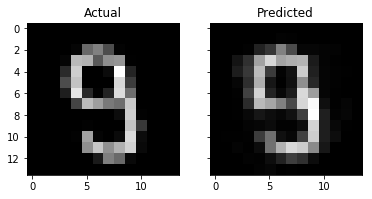

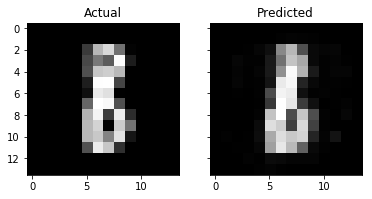

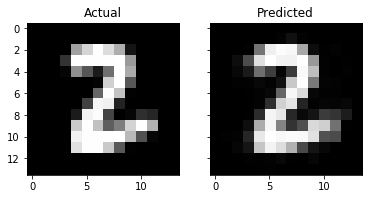

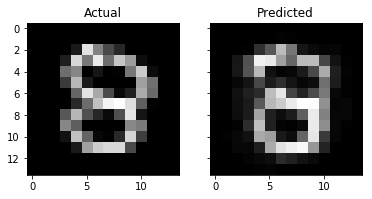

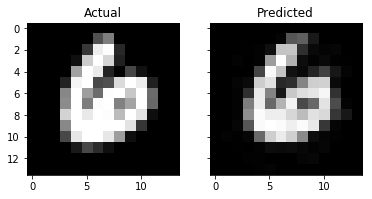

In [4]:
rand_int = np.random.randint(0,X_test.shape[0],size=(1, 5))[0]
for i in range(len(rand_int)):
    Z, Y, S_Z, S_Y = forward_pass(X_test[rand_int[i], :], W_hi, W_jh, b_h, b_o)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.title.set_text('Actual')
    ax1.imshow(np.reshape(X_test[rand_int[i],:], (14,14)), cmap = "gray")
    ax2.title.set_text('Predicted')
    ax2.imshow(np.reshape(S_Y, (14,14)), cmap = "gray")

## Conclusions:

### The sparse autoencoder was implemented and the results are satisfactory